# EDA: TechJam 2018 

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import os
import sys
import seaborn as sns

%matplotlib inline

### Load Data

In [2]:
# Read all data
adr = pd.read_csv('data/adr.csv')
cc_txn = pd.read_csv('data/cc_txn.csv')
demo = pd.read_csv('data/demo.csv')
sa = pd.read_csv('data/sa.csv')
y_train = pd.read_csv('data/y_train.csv')

### Address Data

In [3]:
adr.head()

,ip_id,prov
0,2,ลำพูน
1,6,นครปฐม
2,6,นครราชสีมา
3,8,นครราชสีมา
4,12,ปทุมธานี


In [4]:
adr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4737 entries, 0 to 4736
Data columns (total 2 columns):
ip_id    4737 non-null int64
prov     4737 non-null object
dtypes: int64(1), object(1)
memory usage: 74.1+ KB


In [5]:
print(adr['prov'].value_counts()[0:10])

กทม.                                        234
ชลบุรี                                      167
ปทุมธานี                                    135
นนทบุรี                                     127
ระยอง                                       127
สมุทรปราการ                                 124
เชียงราย                                    120
นครราชสีมา                                  115
ตาก                                         113
นครนายก                                     112
Name: prov, dtype: int64


In [6]:
adr.ip_id.nunique()

3633

Unique Customer Address: 3633

In [7]:
max(adr.groupby('ip_id').size())

5

### Credit card transaction details, cc_txn
**ip_id:** Dummy user id<br>
**dt:** Transaction date<br>
**category:** Category code<br>
**card:** Card Number Hash<br>
**txn_amt:** Transaction amount<br>

In [8]:
cc_txn.head()

,ip_id,dt,category,card,txn_amt
0,1,2017-02-02,cat2,card1,13150.0
1,1,2017-02-06,cat15,card2,9786.0
2,1,2017-02-12,cat2,card1,11165.0
3,1,2017-02-15,cat15,card1,8948.0
4,1,2017-02-18,cat3,card2,4609.0


In [9]:
cc_txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627894 entries, 0 to 627893
Data columns (total 5 columns):
ip_id       627894 non-null int64
dt          627894 non-null object
category    627894 non-null object
card        627894 non-null object
txn_amt     627894 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 24.0+ MB


In [10]:
cc_txn.txn_amt.describe()

count    627894.000000
mean       6474.422524
std        7505.275337
min           1.000000
25%        2252.000000
50%        4796.000000
75%        8365.000000
max      902222.000000
Name: txn_amt, dtype: float64

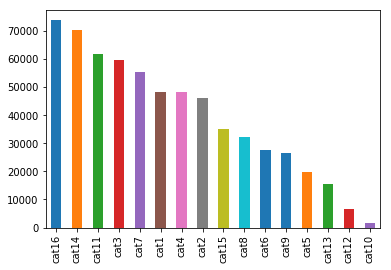

In [11]:
cc_txn['category'].value_counts().plot(kind='bar')

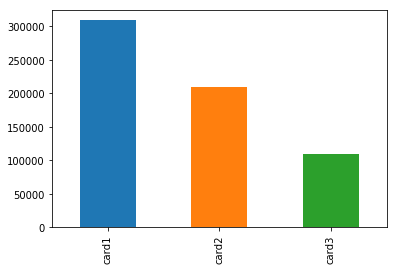

In [12]:
cc_txn['card'].value_counts().plot(kind='bar')

In [13]:
cc_txn['ip_id'].nunique()

7488

In [71]:
cc_txn['cat-card'] = cc_txn['category'] + '-' + cc_txn['card']

In [72]:
cc_txn.head()

,ip_id,dt,category,card,txn_amt,cat-card
0,1,2017-02-02,cat2,card1,13150.0,cat2-card1
1,1,2017-02-06,cat15,card2,9786.0,cat15-card2
2,1,2017-02-12,cat2,card1,11165.0,cat2-card1
3,1,2017-02-15,cat15,card1,8948.0,cat15-card1
4,1,2017-02-18,cat3,card2,4609.0,cat3-card2


In [75]:
cc_txn['cat-card'] = cc_txn['category'] + '-' + cc_txn['card']
count_cate = pd.DataFrame(cc_txn.groupby(['ip_id','cat-card']).size()).reset_index().pivot(index='ip_id',columns='cat-card',values=0).fillna(0)

In [80]:
cc_txn.dt.tolist()

['2017-02-02',
 '2017-02-06',
 '2017-02-12',
 '2017-02-15',
 '2017-02-18',
 '2017-02-19',
 '2017-02-21',
 '2017-02-24',
 '2017-02-24',
 '2017-02-26',
 '2017-02-28',
 '2017-03-03',
 '2017-03-05',
 '2017-03-05',
 '2017-03-15',
 '2017-03-15',
 '2017-03-18',
 '2017-03-27',
 '2017-04-01',
 '2017-04-02',
 '2017-04-03',
 '2017-04-03',
 '2017-04-05',
 '2017-04-06',
 '2017-04-09',
 '2017-04-10',
 '2017-04-16',
 '2017-04-17',
 '2017-04-17',
 '2017-04-28',
 '2017-05-05',
 '2017-05-17',
 '2017-05-18',
 '2017-05-23',
 '2017-05-31',
 '2017-06-03',
 '2017-06-06',
 '2017-06-07',
 '2017-06-07',
 '2017-06-11',
 '2017-06-11',
 '2017-06-13',
 '2017-06-13',
 '2017-06-18',
 '2017-07-01',
 '2017-07-13',
 '2017-07-15',
 '2017-07-17',
 '2017-07-24',
 '2017-07-24',
 '2017-08-01',
 '2017-08-08',
 '2017-08-09',
 '2017-08-23',
 '2017-08-29',
 '2017-09-04',
 '2017-09-07',
 '2017-09-14',
 '2017-09-16',
 '2017-09-19',
 '2017-09-21',
 '2017-09-24',
 '2017-09-29',
 '2017-10-05',
 '2017-10-10',
 '2017-10-12',
 '2017-10-

In [91]:
cc_txn['dt_month'] = cc_txn.dt.str.split('-').str[1]
cc_txn['dt_year'] = cc_txn.dt.str.split('-').str[0]
cc_txn['dt_day'] = cc_txn.dt.str.split('-').str[2]

In [92]:
cc_txn.head()

,ip_id,dt,category,card,txn_amt,cat-card,new_dt,dt_month,dt_year,dt_day
0,1,2017-02-02,cat2,card1,13150.0,cat2-card1,"[2017, 02, 02]",02,2017,02
1,1,2017-02-06,cat15,card2,9786.0,cat15-card2,"[2017, 02, 06]",02,2017,06
2,1,2017-02-12,cat2,card1,11165.0,cat2-card1,"[2017, 02, 12]",02,2017,12
3,1,2017-02-15,cat15,card1,8948.0,cat15-card1,"[2017, 02, 15]",02,2017,15
4,1,2017-02-18,cat3,card2,4609.0,cat3-card2,"[2017, 02, 18]",02,2017,18


In [98]:
df_cc=cc_txn[cc_txn['dt_year']=='2017']

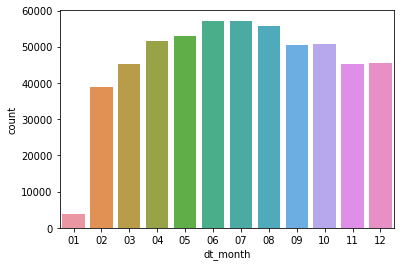

In [99]:
sns.countplot(x="dt_month", data=df_cc)

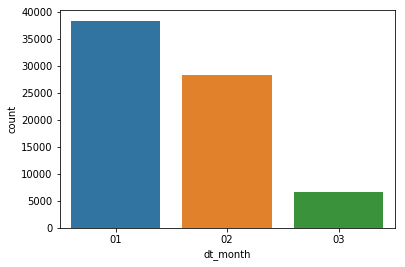

In [100]:
sns.countplot(x="dt_month", data=cc_txn[cc_txn['dt_year']=='2018'])

### Demographic details

**brth_yr:** Birthday in year <br>
**act_strt_dt:** Account start date (the day customers become Kbank’s customers)<br>
**no_of_dpnd_chl:** Number of dependent child<br>
**cis_income:** Salary<br>
**crn_bal:** Current balance in saving account<br>
**gnd_cd:** Gender 0: Female 1: Male<br>
**mar_st_cd:** Marital status code 1: Single 2: Married 3: Widow 4: Single<br>

In [14]:
demo.head()

,ip_id,brth_yr,act_strt_dt,no_of_dpnd_chl,cis_income,crn_bal,gnd_cd,mar_st_cd,ctf_tp_cd,ocp_cd
0,1,1990.0,2011-12-11,0.0,45864.0,876428.0,2.0,2.0,3.0,9
1,2,1986.0,2010-06-08,1.0,43355.0,540649.0,2.0,2.0,1.0,3
2,3,1983.0,2013-12-06,0.0,48836.0,310503.0,2.0,2.0,2.0,12
3,4,1984.0,2009-12-27,0.0,44397.0,34209.0,2.0,2.0,5.0,11
4,5,1986.0,2006-09-01,1.0,43281.0,39963.0,2.0,3.0,6.0,9


In [15]:
demo.ip_id.nunique()

10299

In [16]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 10 columns):
ip_id             10299 non-null int64
brth_yr           10299 non-null float64
act_strt_dt       10299 non-null object
no_of_dpnd_chl    10299 non-null float64
cis_income        10299 non-null float64
crn_bal           10299 non-null float64
gnd_cd            10299 non-null float64
mar_st_cd         10299 non-null float64
ctf_tp_cd         10299 non-null float64
ocp_cd            10299 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 804.7+ KB


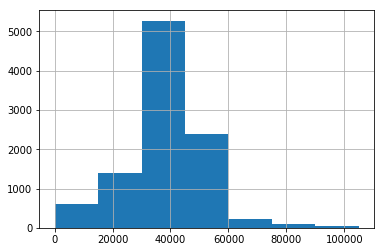

In [17]:
demo.cis_income.hist(bins=[0,15000,30000,45000,60000,75000,90000,105000])

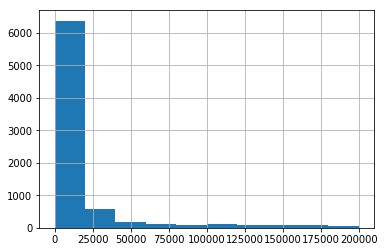

In [18]:
demo.crn_bal.hist(bins=[0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000])

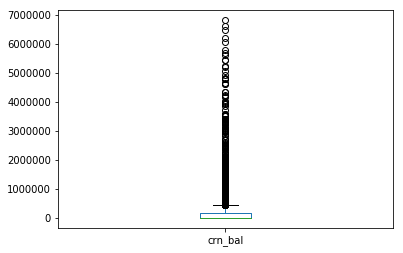

In [19]:
demo.crn_bal.plot.box()

### Saving account balance details 

**dt:** Transaction date<br>
**channel:** Channel of transaction<br>
**tp:** Type of transaction DR: Debit CR: Credit<br>
**amt:** Transaction Amount<br>

In [20]:
sa.head()

,ip_id,dt,channel,tp,amt
0,1,2017-02-06,EDC,DR,1045.0
1,1,2017-02-28,Branch,CR,995.0
2,1,2017-03-15,KPlus,DR,6311.0
3,1,2017-03-22,KPlus,CR,884.0
4,1,2017-03-26,Branch,DR,4890.0


In [21]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478658 entries, 0 to 478657
Data columns (total 5 columns):
ip_id      478658 non-null int64
dt         478658 non-null object
channel    478658 non-null object
tp         478658 non-null object
amt        478658 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 18.3+ MB


In [22]:
sa.channel.value_counts()

KPlus               159711
ATM                 127780
Branch               67715
CorporateConnect     57048
CDM                  38834
EDC                  27570
Name: channel, dtype: int64

### Training Label

In [23]:
y_train.head()

,ip_id,label
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0


In [24]:
y_train.label.value_counts()

0.0    5947
1.0     414
Name: label, dtype: int64

**label 0 (Not Default, ไม่เบี้ยว):** 93.5%</br>
**label 1 (Default, เบี้ยว):**       6.5%

In [25]:
y_train.ip_id.nunique()

6361

## 3. Join Data 

In [26]:
df = demo.set_index('ip_id').join(y_train.set_index('ip_id'), how='inner')

In [27]:
df.head()

,brth_yr,act_strt_dt,no_of_dpnd_chl,cis_income,crn_bal,gnd_cd,mar_st_cd,ctf_tp_cd,ocp_cd,label
ip_id,,,,,,,,,,
1,1990.0,2011-12-11,0.0,45864.0,876428.0,2.0,2.0,3.0,9,0.0
2,1986.0,2010-06-08,1.0,43355.0,540649.0,2.0,2.0,1.0,3,0.0
3,1983.0,2013-12-06,0.0,48836.0,310503.0,2.0,2.0,2.0,12,0.0
4,1984.0,2009-12-27,0.0,44397.0,34209.0,2.0,2.0,5.0,11,0.0
5,1986.0,2006-09-01,1.0,43281.0,39963.0,2.0,3.0,6.0,9,0.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6361 entries, 1 to 6361
Data columns (total 10 columns):
brth_yr           6361 non-null float64
act_strt_dt       6361 non-null object
no_of_dpnd_chl    6361 non-null float64
cis_income        6361 non-null float64
crn_bal           6361 non-null float64
gnd_cd            6361 non-null float64
mar_st_cd         6361 non-null float64
ctf_tp_cd         6361 non-null float64
ocp_cd            6361 non-null int64
label             6361 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 546.6+ KB


In [29]:
df = df.join(adr.set_index('ip_id'),how='left')

In [30]:
df['prov'] = df['prov'].fillna('Unknown')

### Play with test data

In [56]:
y_test_idx = pd.read_csv('data/y_test_index.csv',index_col='ip_id')

In [48]:
y_test_idx.head()

""
ip_id
6362
6363
6364
6365
6366


In [50]:
demo.head()

,ip_id,brth_yr,act_strt_dt,no_of_dpnd_chl,cis_income,crn_bal,gnd_cd,mar_st_cd,ctf_tp_cd,ocp_cd
0,1,1990.0,2011-12-11,0.0,45864.0,876428.0,2.0,2.0,3.0,9
1,2,1986.0,2010-06-08,1.0,43355.0,540649.0,2.0,2.0,1.0,3
2,3,1983.0,2013-12-06,0.0,48836.0,310503.0,2.0,2.0,2.0,12
3,4,1984.0,2009-12-27,0.0,44397.0,34209.0,2.0,2.0,5.0,11
4,5,1986.0,2006-09-01,1.0,43281.0,39963.0,2.0,3.0,6.0,9


In [57]:
df_test = demo.set_index('ip_id').join(y_test_idx,how="inner")

In [58]:
df_test.head()

,brth_yr,act_strt_dt,no_of_dpnd_chl,cis_income,crn_bal,gnd_cd,mar_st_cd,ctf_tp_cd,ocp_cd
ip_id,,,,,,,,,
6362,1985.0,2004-10-27,0.0,39723.0,101453.0,1.0,1.0,4.0,12
6363,1974.0,2012-05-23,0.0,36402.0,500.0,2.0,1.0,4.0,3
6364,1983.0,2018-01-11,1.0,36457.0,11726.0,2.0,1.0,4.0,3
6365,1986.0,1998-03-03,0.0,43399.0,8723.0,2.0,1.0,4.0,3
6366,1978.0,2013-03-17,0.0,31362.0,20812.0,1.0,1.0,4.0,3


In [59]:
df_test = df_test.join(adr.set_index('ip_id'),how="left")

In [60]:
df_test.head()

,brth_yr,act_strt_dt,no_of_dpnd_chl,cis_income,crn_bal,gnd_cd,mar_st_cd,ctf_tp_cd,ocp_cd,prov
ip_id,,,,,,,,,,
6362,1985.0,2004-10-27,0.0,39723.0,101453.0,1.0,1.0,4.0,12,กทม.
6363,1974.0,2012-05-23,0.0,36402.0,500.0,2.0,1.0,4.0,3,NaN
6364,1983.0,2018-01-11,1.0,36457.0,11726.0,2.0,1.0,4.0,3,NaN
6365,1986.0,1998-03-03,0.0,43399.0,8723.0,2.0,1.0,4.0,3,กทม.
6366,1978.0,2013-03-17,0.0,31362.0,20812.0,1.0,1.0,4.0,3,NaN


In [61]:
len(df_test)

3938

In [62]:
df_test.isnull().sum()

brth_yr              0
act_strt_dt          0
no_of_dpnd_chl       0
cis_income           0
crn_bal              0
gnd_cd               0
mar_st_cd            0
ctf_tp_cd            0
ocp_cd               0
prov              3342
dtype: int64